Iteration 1/100, Best Fitness: 12.795028580362644
Iteration 2/100, Best Fitness: 12.795028580362644
Iteration 3/100, Best Fitness: 5.719860043632352
Iteration 4/100, Best Fitness: 5.719860043632352
Iteration 5/100, Best Fitness: 5.1193483301432465
Iteration 6/100, Best Fitness: 5.1193483301432465
Iteration 7/100, Best Fitness: 5.1193483301432465
Iteration 8/100, Best Fitness: 5.1193483301432465
Iteration 9/100, Best Fitness: 1.5826693573779949
Iteration 10/100, Best Fitness: 1.5826693573779949
Iteration 11/100, Best Fitness: 1.5826693573779949
Iteration 12/100, Best Fitness: 1.5826693573779949
Iteration 13/100, Best Fitness: 1.5826693573779949
Iteration 14/100, Best Fitness: 1.5826693573779949
Iteration 15/100, Best Fitness: 1.5826693573779949
Iteration 16/100, Best Fitness: 1.5826693573779949
Iteration 17/100, Best Fitness: 1.5826693573779949
Iteration 18/100, Best Fitness: 1.5826693573779949
Iteration 19/100, Best Fitness: 1.5826693573779949
Iteration 20/100, Best Fitness: 1.58266935

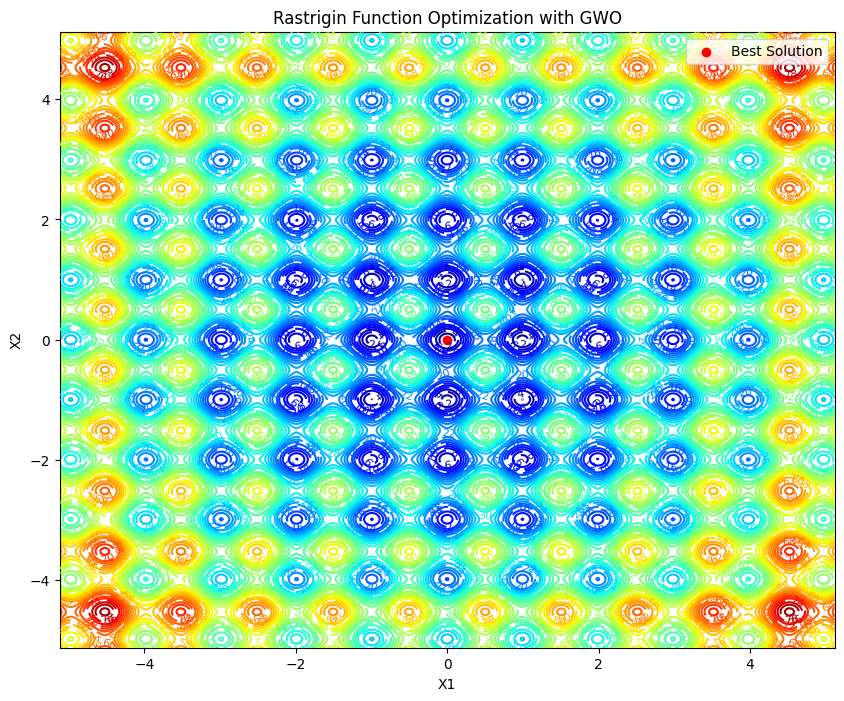

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin function definition
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x), axis=-1)

# Grey Wolf Optimizer (GWO) Algorithm
class GWO:
    def __init__(self, obj_func, dim, num_wolves, max_iter, lb, ub):
        self.obj_func = obj_func  # The objective function
        self.dim = dim  # Dimensionality of the problem
        self.num_wolves = num_wolves  # Number of wolves in the population
        self.max_iter = max_iter  # Maximum number of iterations
        self.lb = lb  # Lower bound of the search space
        self.ub = ub  # Upper bound of the search space

        # Initialize positions of wolves randomly
        self.positions = np.random.uniform(self.lb, self.ub, (self.num_wolves, self.dim))

        # Initialize alpha, beta, and delta wolves
        self.alpha_pos = np.zeros(self.dim)
        self.beta_pos = np.zeros(self.dim)
        self.delta_pos = np.zeros(self.dim)

        # Initialize alpha, beta, and delta scores
        self.alpha_score = float("inf")
        self.beta_score = float("inf")
        self.delta_score = float("inf")

    def update_positions(self, a):
        # Update the positions of the wolves
        for i in range(self.num_wolves):
            for j in range(self.dim):
                r1 = np.random.random()
                r2 = np.random.random()

                A = 2 * a * r1 - a  # Coefficient for the distance to the alpha wolf
                C = 2 * r2  # Coefficient for the direction to the alpha wolf

                # Calculate distance to alpha, beta, and delta wolves
                D_alpha = np.abs(C * self.alpha_pos[j] - self.positions[i, j])
                D_beta = np.abs(C * self.beta_pos[j] - self.positions[i, j])
                D_delta = np.abs(C * self.delta_pos[j] - self.positions[i, j])

                # Update the position of each wolf considering all three leaders
                self.positions[i, j] = self.positions[i, j] + A * (D_alpha + D_beta + D_delta) / 3

                # Ensure the positions remain within bounds
                self.positions[i, j] = np.clip(self.positions[i, j], self.lb, self.ub)

    def optimize(self):
        # Optimization loop
        a = 2  # Initial value of a (linearly decreases)
        for t in range(self.max_iter):
            for i in range(self.num_wolves):
                # Evaluate fitness of the current wolf
                fitness = self.obj_func(self.positions[i, :])

                # Update alpha, beta, and delta wolves
                if fitness < self.alpha_score:
                    self.alpha_score = fitness
                    self.alpha_pos = self.positions[i, :]
                elif fitness < self.beta_score:
                    self.beta_score = fitness
                    self.beta_pos = self.positions[i, :]
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.positions[i, :]

            # Update the positions of wolves
            a = 2 - t * (2 / self.max_iter)  # Linearly decrease a
            self.update_positions(a)

            # Print the best score at each iteration
            print(f"Iteration {t+1}/{self.max_iter}, Best Fitness: {self.alpha_score}")

        return self.alpha_pos, self.alpha_score

# Problem parameters
dim = 2  # Dimensionality of the problem (Rastrigin function in 2D)
num_wolves = 30  # Number of wolves
max_iter = 100  # Maximum number of iterations
lb = -5.12  # Lower bound for Rastrigin function
ub = 5.12  # Upper bound for Rastrigin function

# Initialize and optimize using GWO
gwo = GWO(obj_func=rastrigin, dim=dim, num_wolves=num_wolves, max_iter=max_iter, lb=lb, ub=ub)
best_pos, best_score = gwo.optimize()

# Display the best solution
print("Best Position: ", best_pos)
print("Best Fitness (Rastrigin value): ", best_score)

# Visualization (2D plot of the Rastrigin function)
x = np.linspace(lb, ub, 500)
y = np.linspace(lb, ub, 500)
X, Y = np.meshgrid(x, y)

# Compute the Z values for the Rastrigin function
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rastrigin(np.array([X[i, j], Y[i, j]]))  # Apply Rastrigin to each pair (X[i,j], Y[i,j])

# Plot the contour
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
contour = ax.contour(X, Y, Z, 50, cmap="jet")
ax.clabel(contour, inline=True, fontsize=8)
ax.scatter(best_pos[0], best_pos[1], color='red', label="Best Solution")
ax.set_title("Rastrigin Function Optimization with GWO")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()
plt.show()
